In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import neurobiases

from importlib import reload
from mpl_toolkits.axes_grid1 import make_axes_locatable
from neurobiases import TriangularModel, utils
from scipy.linalg import svd
%matplotlib inline

# Basis functions tuning formulation

## Plot basis functions

In [2]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        parameter_design='basis_functions',
        M=20, N=23, K=4,
        tuning_sparsity=0.6, coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

In [3]:
tm = TriangularModel(
    model='linear',
    parameter_design='basis_functions',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)

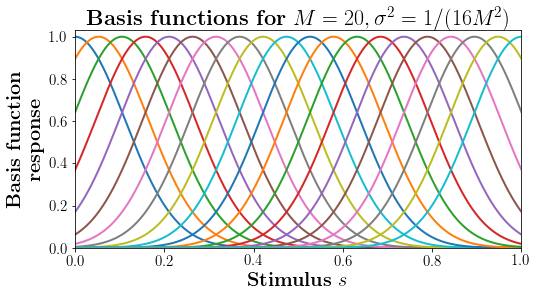

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
stimuli = np.linspace(0, 1, 1000)
basis_functions = utils.calculate_tuning_features(stimuli, tm.bf_centers, tm.bf_scale)

for idx in range(tm.M):
    ax.plot(stimuli, basis_functions[:, idx], linewidth=2)
    
ax.tick_params(labelsize=15)
ax.set_xlim([0, 1])
ax.set_xlabel(r'\textbf{Stimulus} $s$', fontsize=20)
ax.set_ylim([0, 1.03])
ax.set_ylabel(r'\textbf{Basis function}' '\n'r'\textbf{response}', fontsize=20)
ax.set_title(r'\textbf{Basis functions for} $M=20, \sigma^2=1/(16M^2)$', fontsize=22)
plt.savefig('basis_functions.pdf', bbox_inches='tight')
plt.show()

## Plot tuning curves

In [5]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        parameter_design='basis_functions',
        M=20, N=23, K=4,
        tuning_sparsity=0.75, coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

In [6]:
tm1 = TriangularModel(
    model='linear',
    parameter_design='basis_functions',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)

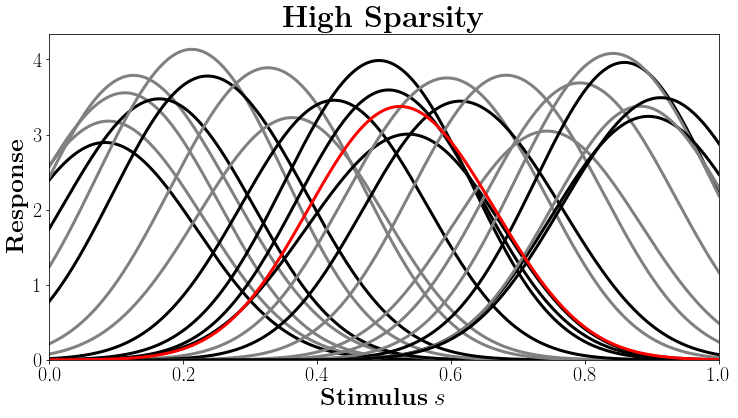

In [7]:
fig, ax = tm1.plot_tuning_curves(linewidth=3)
ax.set_xlim([0, 1])
ax.set_ylim(bottom=0)
ax.set_xlabel(r'\textbf{Stimulus} $s$', fontsize=25)
ax.set_ylabel(r'\textbf{Response}', fontsize=25)
ax.set_title(r'\textbf{High Sparsity}', fontsize=30)
plt.savefig('tuning_curves_bf_high_sparsity.pdf', bbox_inches='tight')
plt.show()

In [8]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        parameter_design='basis_functions',
        M=20, N=23, K=4,
        tuning_sparsity=0.0, coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

In [9]:
tm2 = TriangularModel(
    model='linear',
    parameter_design='basis_functions',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)

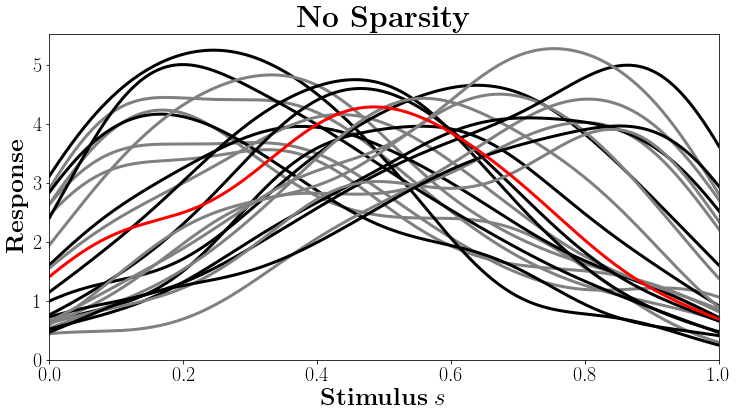

In [10]:
fig, ax = tm2.plot_tuning_curves(linewidth=3)
ax.set_xlim([0, 1])
ax.set_ylim(bottom=0)
ax.set_xlabel(r'\textbf{Stimulus} $s$', fontsize=25)
ax.set_ylabel(r'\textbf{Response}', fontsize=25)
ax.set_title(r'\textbf{No Sparsity}', fontsize=30)
plt.savefig('tuning_curves_bf_no_sparsity.pdf', bbox_inches='tight')
plt.show()

In [11]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        parameter_design='basis_functions',
        M=50, N=23, K=4,
        tuning_sparsity=0.75, coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

In [12]:
tm3 = TriangularModel(
    model='linear',
    parameter_design='basis_functions',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)

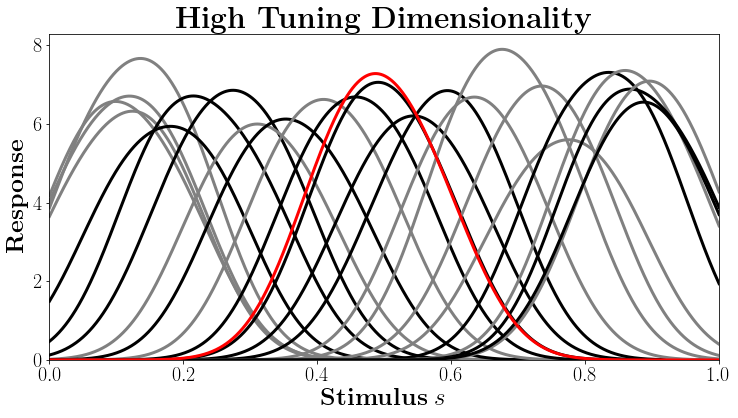

In [13]:
fig, ax = tm3.plot_tuning_curves(linewidth=3)
ax.set_xlim([0, 1])
ax.set_ylim(bottom=0)
ax.set_xlabel(r'\textbf{Stimulus} $s$', fontsize=25)
ax.set_ylabel(r'\textbf{Response}', fontsize=25)
ax.set_title(r'\textbf{High Tuning Dimensionality}', fontsize=30)
plt.show()

# Direct response tuning formulation

## Plot tuning curves

In [14]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        parameter_design='direct_response',
        M=20, N=25, K=4,
        tuning_sparsity=0.60, coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

In [15]:
tm = TriangularModel(
    model='linear',
    parameter_design='direct_response',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)

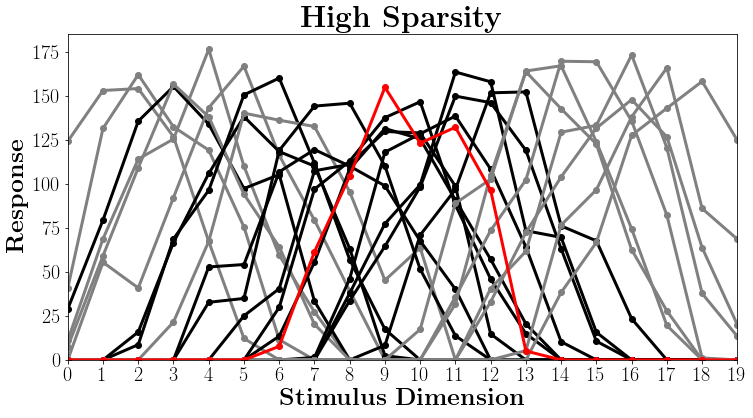

In [16]:
fig, ax = tm.plot_tuning_curves(linewidth=3)
ax.set_xticks(np.arange(tm.M))
ax.set_xlim([0, tm.M - 1])
ax.set_ylim(bottom=0)
ax.set_xlabel(r'\textbf{Stimulus Dimension}', fontsize=25)
ax.set_ylabel(r'\textbf{Response}', fontsize=25)
ax.set_title(r'\textbf{High Sparsity}', fontsize=30)
plt.savefig('tuning_curves_dr_high_sparsity.pdf', bbox_inches='tight')
plt.show()

In [17]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        parameter_design='direct_response',
        M=20, N=25, K=4,
        tuning_sparsity=0., coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

In [18]:
tm2 = TriangularModel(
    model='linear',
    parameter_design='direct_response',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)

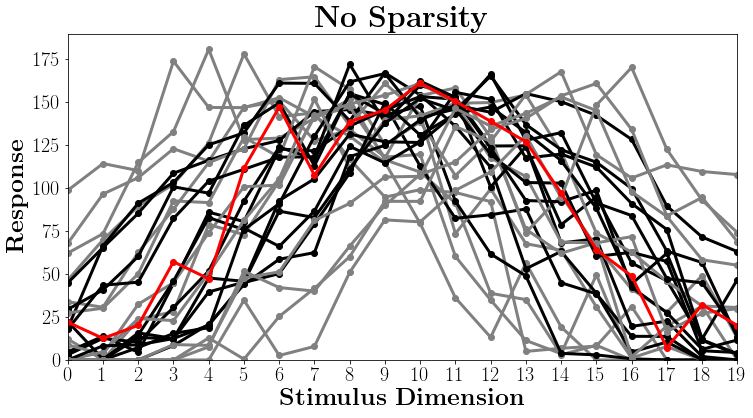

In [19]:
fig, ax = tm2.plot_tuning_curves(linewidth=3)
ax.set_xticks(np.arange(tm2.M))
ax.set_xlim([0, tm2.M - 1])
ax.set_ylim(bottom=0)
ax.set_xlabel(r'\textbf{Stimulus Dimension}', fontsize=25)
ax.set_ylabel(r'\textbf{Response}', fontsize=25)
ax.set_title(r'\textbf{No Sparsity}', fontsize=30)
plt.savefig('tuning_curves_dr_no_sparsity.pdf', bbox_inches='tight')
plt.show()

# Clustered noise correlation structure

In [89]:
tms = []
Ks = [1, 3, 5, 7]
for K in Ks:
    tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
        TriangularModel.generate_kwargs(
            parameter_design='direct_response',
            M=20, N=25, K=K,
            corr_cluster=0.4, corr_back=0.1,
            tuning_sparsity=0.60, coupling_sparsity=0.5,
            tuning_random_state=2332, coupling_random_state=2332)
    tm = TriangularModel(
        model='linear',
        parameter_design='direct_response',
        tuning_kwargs=tuning_kwargs,
        coupling_kwargs=coupling_kwargs,
        noise_kwargs=noise_kwargs,
        stim_kwargs=stim_kwargs)
    tms.append(tm)

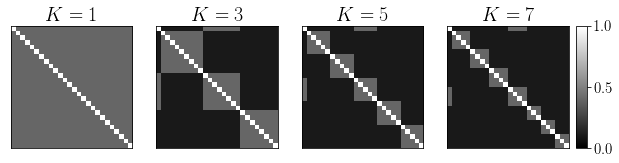

In [96]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

for tm, ax, K in zip(tms, axes, Ks):
    corr = utils.cov2corr(np.diag(tm.Psi) + np.dot(tm.L.T, tm.L))
    img = ax.imshow(corr, origin='upper', vmin=0, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(r'$K=%s$' %K, fontsize=20)
    
cax = fig.add_axes([axes[-1].get_position().x1 + 0.01,
                    axes[-1].get_position().y0,
                    0.015,
                    ax.get_position().height])
cax.tick_params(labelsize=15)
cb = fig.colorbar(img, cax=cax)
cb.set_ticks([0, 0.5, 1.0])

plt.savefig('cluster_noise_correlations.pdf', bbox_inches='tight')